In [14]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import mplfinance as mpf

today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

d2 = date.today() - timedelta(days=420)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("BTC-USD", start=start_date, end=end_date, progress=False)

data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date          Open          High           Low         Close  \
0 2022-12-31  16603.673828  16628.986328  16517.519531  16547.496094   
1 2023-01-01  16547.914062  16630.439453  16521.234375  16625.080078   
2 2023-01-02  16625.509766  16759.343750  16572.228516  16688.470703   
3 2023-01-03  16688.847656  16760.447266  16622.371094  16679.857422   
4 2023-01-04  16680.205078  16964.585938  16667.763672  16863.238281   

      Adj Close       Volume  
0  16547.496094  11239186456  
1  16625.080078   9244361700  
2  16688.470703  12097775227  
3  16679.857422  13903079207  
4  16863.238281  18421743322  


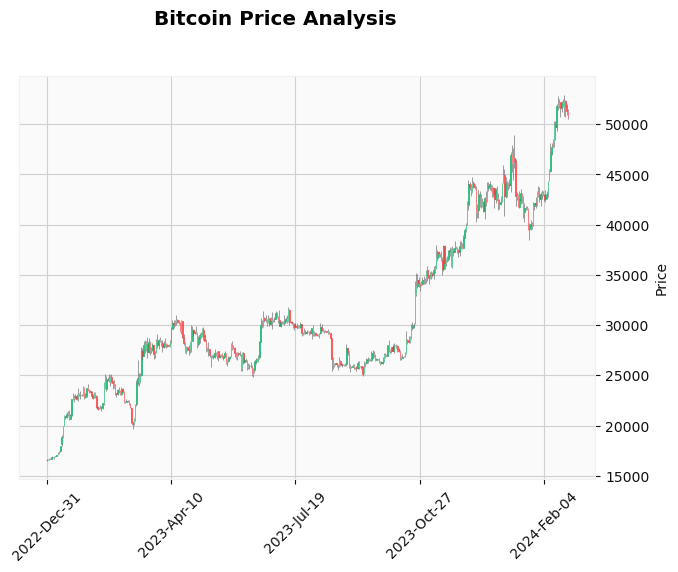

Close        1.000000
Adj Close    1.000000
High         0.998537
Low          0.997908
Open         0.995847
Date         0.865337
Volume       0.235782
Name: Close, dtype: float64


In [18]:
data.index = pd.to_datetime(data["Date"])
mpf.plot(data, type="candle", title="Bitcoin Price Analysis", style="yahoo")
plt.show()

correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

### Price Prediction Model